### Chiziqli regressiya

#### 1-qandam
- Kerakli kutibxonalarni import qilish

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2- qadam
- Data ya'ni ma'lumotlarni yuklab olamiz

In [112]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


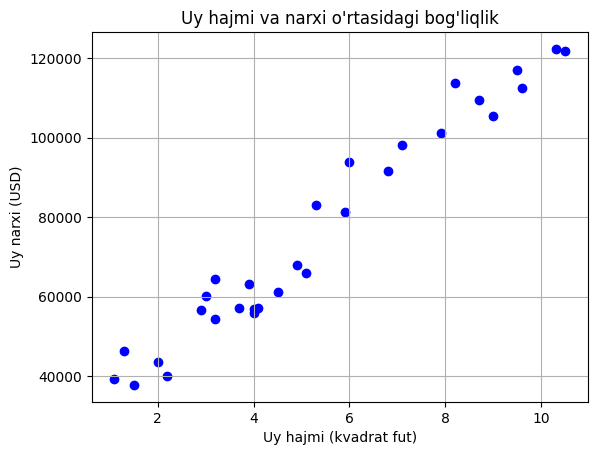

In [114]:
# Scatter grafik
plt.scatter(data["YearsExperience"], data["Salary"], color="blue")
# plt.plot(X, yasalgan_y)
plt.title("Uy hajmi va narxi o'rtasidagi bog'liqlik")
plt.xlabel("Uy hajmi (kvadrat fut)")
plt.ylabel("Uy narxi (USD)")
plt.grid()
plt.show()

#### 3-qadam
- Linear regression modelini o'rgatish uchun va qanchalik o'rganganini tekshirish uchun
**train va test data** larni ajratib olamniz

- Datasetni train va test qismlarga ajratish uchun **sklearn** kutibxonasidan foydalanamiz

In [2]:
# sklear nutibxonasidagi datasetni ajratuvchi kutibxonani import qilishi
from sklearn.model_selection import train_test_split

In [73]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [99]:
X = data.iloc[:, :-1].values
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [100]:
y = data.iloc[:, -1].values
y[:5]

array([39343., 46205., 37731., 43525., 39891.])

In [101]:
# train_test_split 4 ta qiymat qaytaradi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [115]:
print(X_train.shape)
X_train[:5]

(24, 1)


array([[10.3],
       [ 8.7],
       [ 4. ],
       [ 1.1],
       [ 2.2]])

In [116]:
print(y_train.shape)
y_train

(24,)


array([122391., 109431.,  56957.,  39343.,  39891.,  66029.,  56642.,
        57081.,  55794., 101302.,  46205.,  37731., 105582.,  43525.,
        98273., 116969.,  81363., 121872.,  91738.,  54445.,  63218.,
        61111.,  93940.,  60150.])

In [117]:
print(X_test.shape)
X_test

(6, 1)


array([[9.6],
       [4.9],
       [8.2],
       [5.3],
       [3.2],
       [3.7]])

In [118]:
print(y_test.shape)
y_test

(6,)


array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

#### 4-qadam. Linear regressiya modelini tayyorlash
- sklearn kutibxonasidan foydalanamiz

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
lrmodel = LinearRegression()

5-qadam. Modelni o'rgatish
- Modelni tayyorlab oldik endi
- X_train va y_train data orqali modelni o'qtamiz

In [121]:
lrmodel.fit(X_train, y_train)

LinearRegression()

5-qadam. Modelni bashoratlash
- Model o'rganib bo'ldini
- Modelni bashoratlash uchun X_test datadan foydalanamiz

In [122]:
y_pred = lrmodel.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

In [123]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189.])

In [125]:
# Print the coefficients
print("Intercept (Beta_0):", lrmodel.intercept_)
print("Slope (Beta_1):", lrmodel.coef_[0])

Intercept (Beta_0): 25321.583011776813
Slope (Beta_1): 9423.815323030976


In [131]:
# Display predictions
natija = pd.DataFrame({"Xaqiqiy": y_test, "Bashorat": y_pred})
natija

,Xaqiqiy,Bashorat
0,112635.0,115790.210113
1,67938.0,71498.278095
2,113812.0,102596.868661
3,83088.0,75267.804224
4,64445.0,55477.792045
5,57189.0,60189.699707


In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [134]:
mae = mean_absolute_error(y_test, y_pred)
print("O'rtacha absalyut xato (MSE):", mae)

O'rtacha absalyut xato (MSE): 6286.453830757749


In [135]:
# O'rtacha kvadratik xato (MSE) va R-kvadratni hisoblash
mse = mean_squared_error(y_test, y_pred)
print("O'rtacha kvadratik xato (MSE):", mse)

O'rtacha kvadratik xato (MSE): 49830096.85590839


In [136]:
rmse = pow(mse, 1/2)
rmse

7059.04362190151

In [137]:
r2 = r2_score(y_test, y_pred)
print("R-kvadrat (R^2):", r2)

R-kvadrat (R^2): 0.9024461774180497


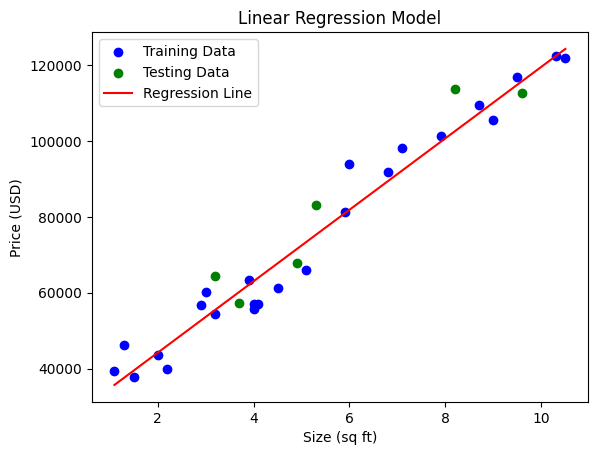

In [130]:
# Plot training data and regression line
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.scatter(X_test, y_test, color="green", label="Testing Data")
plt.plot(X, lrmodel.predict(X), color="red", label="Regression Line")
plt.title("Linear Regression Model")
plt.xlabel("Size (sq ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()